In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Gather data by reading the titanic csv file into this notebook

In [2]:
titanic_df = pd.read_csv("tested.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Assess data to identify areas for data wrangling
Visual and programmatic assessment is done at this stage to come up with candidates for wrangling

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
titanic_df.Survived.value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [8]:
titanic_df.Pclass.value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [9]:
titanic_df.Sex.value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [10]:
titanic_df.Cabin.value_counts()

B57 B59 B63 B66    3
C78                2
A34                2
C55 C57            2
C101               2
                  ..
C51                1
A18                1
C39                1
D22                1
F33                1
Name: Cabin, Length: 76, dtype: int64

In [11]:
titanic_df.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [13]:
titanic_df.sample(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
174,1066,0,3,"Asplund, Mr. Carl Oscar Vilhelm Gustafsson",male,40.0,1,5,347077,31.3875,NaN,S
363,1255,0,3,"Strilic, Mr. Ivan",male,27.0,0,0,315083,8.6625,NaN,S
109,1001,0,2,"Swane, Mr. George",male,18.5,0,0,248734,13.0000,F,S
10,902,0,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
194,1086,0,2,"Drew, Master. Marshall Brines",male,8.0,0,2,28220,32.5000,NaN,S
231,1123,1,1,"Willard, Miss. Constance",female,21.0,0,0,113795,26.5500,NaN,S
341,1233,0,3,"Lundstrom, Mr. Thure Edvin",male,32.0,0,0,350403,7.5792,NaN,S
255,1147,0,3,"MacKay, Mr. George William",male,NaN,0,0,C.A. 42795,7.5500,NaN,S
217,1109,0,1,"Wick, Mr. George Dennick",male,57.0,1,1,36928,164.8667,NaN,S
112,1004,1,1,"Evans, Miss. Edith Corse",female,36.0,0,0,PC 17531,31.6792,A29,C


#### Issues to clean
- Missing data
- Incorrect data types for the Sex,Embarked, Cabin,survived and pclass columns
- change the dataframe headers have the first letter in uppercase

### Clean data 
Here I work on the issues identified in the previous stage. 

In [21]:
# create a copy so as to preserve the original dataset
titanic_df_clean = titanic_df.copy()

##### Missing data
There is missing data in the Age, fare and cabin columns. I won't replace these values because doing so will distort the data and affect the conclusions that can be generated from the data. I will ignore these in my analysis and use these columns the way they are.

##### Change dataframe headers to lowercase
I am changing these to make the analysis faster 

In [22]:
titanic_df_clean.columns = map(str.lower, titanic_df.columns)

In [23]:
titanic_df_clean.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

##### Incorrect datatypes
Change column data types to the right data types. Columns to change: sex,embarked, cabin, pclass, survived

In [25]:
# Categorical 
titanic_df_clean.sex = titanic_df_clean.sex.astype('category')
titanic_df_clean.embarked = titanic_df_clean.embarked.astype('category')
titanic_df_clean.cabin = titanic_df_clean.cabin.astype('category')
titanic_df_clean.survived = titanic_df_clean.survived.astype('category')
titanic_df_clean.pclass = titanic_df_clean.pclass.astype('category')

In [26]:
titanic_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   passengerid  418 non-null    int64   
 1   survived     418 non-null    category
 2   pclass       418 non-null    category
 3   name         418 non-null    object  
 4   sex          418 non-null    category
 5   age          332 non-null    float64 
 6   sibsp        418 non-null    int64   
 7   parch        418 non-null    int64   
 8   ticket       418 non-null    object  
 9   fare         417 non-null    float64 
 10  cabin        91 non-null     category
 11  embarked     418 non-null    category
dtypes: category(5), float64(2), int64(3), object(2)
memory usage: 28.2+ KB


### Analyzing and Visualizing data

In [27]:
# total passengers that boarded the titanic
titanic_df_clean.passengerid.count()

418

In [32]:
# passengers that survived the shipwreck
titanic_df_clean[titanic_df_clean['survived'] == 1].survived.count()

152

In [30]:
# list of all survivors with their names,age and sex
titanic_df_clean[titanic_df_clean['survived'] == 1].loc[:,['name','age','sex']]

,name,age,sex
1,"Wilkes, Mrs. James (Ellen Needs)",47.0,female
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,female
6,"Connolly, Miss. Kate",30.0,female
8,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.0,female
12,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",23.0,female
...,...,...,...
409,"Peacock, Miss. Treasteall",3.0,female
410,"Naughton, Miss. Hannah",NaN,female
411,"Minahan, Mrs. William Edward (Lillian E Thorpe)",37.0,female
412,"Henriksson, Miss. Jenny Lovisa",28.0,female


In [54]:
# total passengers by class
class_distribution = titanic_df_clean.groupby('pclass').survived.count()
class_distribution

pclass
1    107
2     93
3    218
Name: survived, dtype: int64

In [56]:
# survival rate by passenger class
distribution_pclass_survival = titanic_df_clean.groupby(['survived','pclass']).size()
distribution_pclass_survival

survived  pclass
0         1          57
          2          63
          3         146
1         1          50
          2          30
          3          72
dtype: int64

In [44]:
# survival rate by sex
titanic_df_clean.groupby(['survived','sex']).size()

survived  sex   
0         female      0
          male      266
1         female    152
          male        0
dtype: int64

In [47]:
# where did most people board from?
titanic_df_clean.groupby('embarked').survived.count()

embarked
C    102
Q     46
S    270
Name: survived, dtype: int64

In [48]:
# average fare by class
titanic_df_clean.groupby('pclass').fare.mean()

pclass
1    94.280297
2    22.202104
3    12.459678
Name: fare, dtype: float64

In [51]:
# did people share cabins? Which cabin had the most people and how many were they?
titanic_df_clean.groupby('cabin').survived.count().sort_values(ascending=False)

cabin
B57 B59 B63 B66    3
C6                 2
B45                2
C78                2
C89                2
                  ..
C51                1
C53                1
C54                1
A18                1
G6                 1
Name: survived, Length: 76, dtype: int64

In [52]:
# which cabins belonged to which passenger class and whats the distribution
titanic_df_clean.groupby('pclass').cabin.count().sort_values(ascending=False)

pclass
1    80
2     7
3     4
Name: cabin, dtype: int64

In [53]:
# correlation between port of embarkation and passenger_class
titanic_df_clean.groupby(['embarked','pclass']).size()

embarked  pclass
C         1          56
          2          11
          3          35
Q         1           1
          2           4
          3          41
S         1          50
          2          78
          3         142
dtype: int64

#### Insights
1. 418 passengers boarded the titanic
2. All the female aboard the titanic survived and all the men died
3. The youngest person was less than a year old and the oldest was 76 years old
4. 152 passengers survived and they were all women
5. The biggest number of passengers aboard the ship were in third class with a total of 218, followed by first class at 107 and second class at 93
6. Southampton port had the most passengers boarding the ship with 270 passengers boarding at that port, 102 from Cherbourg port and 46 from Queenstown
7. Even though first class had the second highest number of passengers, they got the most cabins with 80 of the 92 cabins being taken by the passengers in first class. Most of the second and third class passengers in this dataset were not assigned cabins.

### Visualizations

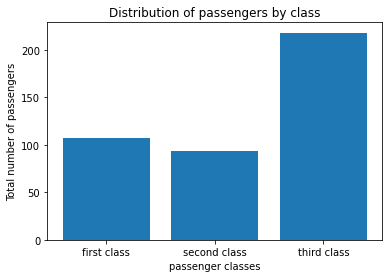

In [55]:
# chart displaying distribution of passengers by pclass
locations = [1,2,3]
heights = class_distribution

labels = ['first class','second class','third class']
plt.bar(locations,heights,tick_label=labels)
plt.title('Distribution of passengers by class')
plt.xlabel('passenger classes')
plt.ylabel('Total number of passengers')
plt.show()